In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

# Scrape data for 'A Light in the Attic' page
url = 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
homepage_url = 'https://books.toscrape.com/'
homepage_response = requests.get(homepage_url)
homepage_soup = BeautifulSoup(homepage_response.content, 'html.parser')


In [21]:
# Extract book information
title = soup.find('h1').text
description = soup.find('meta', attrs={'name': 'description'})['content']
rating = soup.find('p', class_='star-rating')['class'][1]
price_with_tax = soup.find('p', class_='price_color').text
availability = soup.find('p', class_='instock availability').text.strip()

In [23]:


# Function to scrape book data from a single page
def scrape_books_from_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    book_links = [homepage_url +'catalogue/' + link['href'] for link in soup.select('h3 a')]
    
    # Scrape data for each book
    books_data = []
    for book_link in book_links:
        book_response = requests.get(book_link)
        book_soup = BeautifulSoup(book_response.content, 'html.parser')
        
        title = book_soup.find('h1').text
        description = book_soup.find('meta', attrs={'name': 'description'})['content']
        rating = book_soup.find('p', class_='star-rating')['class'][1]
        price_with_tax = book_soup.find('p', class_='price_color').text
        availability = book_soup.find('p', class_='instock availability').text.strip()
        
        book_info = {
            'Title': title,
            'Description': description,
            'Rating': rating,
            'Price (with Tax)': price_with_tax,
            'Availability': availability
        }
        books_data.append(book_info)
    
    return books_data

# Scrape books from multiple pages
all_books_data = []
for page_num in range(1, 51):
    page_url = f'http://books.toscrape.com/catalogue/page-{page_num}.html'
    all_books_data.extend(scrape_books_from_page(page_url))

# Create DataFrame
books_df = pd.DataFrame(all_books_data)

# Display DataFrame
print(books_df.head())

                                   Title  \
0                   A Light in the Attic   
1                     Tipping the Velvet   
2                             Soumission   
3                          Sharp Objects   
4  Sapiens: A Brief History of Humankind   

                                         Description Rating Price (with Tax)  \
0  \n    It's hard to imagine a world without A L...  Three           £51.77   
1  \n    "Erotic and absorbing...Written with sta...    One           £53.74   
2  \n    Dans une France assez proche de la nôtre...    One           £50.10   
3  \n    WICKED above her hipbone, GIRL across he...   Four           £47.82   
4  \n    From a renowned historian comes a ground...   Five           £54.23   

              Availability  
0  In stock (22 available)  
1  In stock (20 available)  
2  In stock (20 available)  
3  In stock (20 available)  
4  In stock (20 available)  


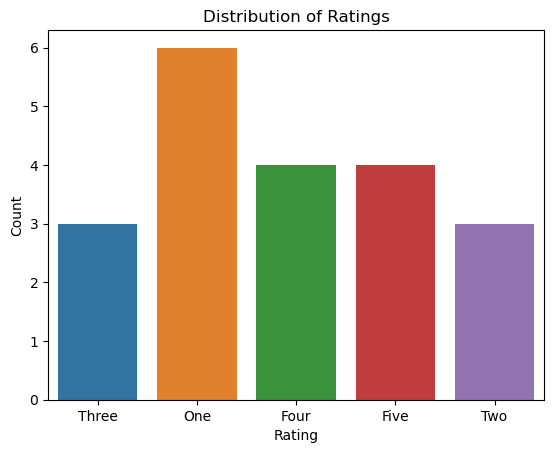

In [8]:
sns.countplot(x='Rating', data=books_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [30]:
# Example: Convert 'Price (with Tax)' column to numeric
books_df['Price (with Tax)'] = books_df['Price (with Tax)'].str.replace('£', '').astype(float)
books_df['Rating']= books_df['Rating'].str.extract('')
# Example: Calculate average price by rating
average_price_by_rating = books_df.groupby('Rating')['Price (with Tax)'].mean()
print(average_price_by_rating)

Rating
Five     35.374490
Four     36.093296
One      34.561195
Three    34.692020
Two      34.810918
Name: Price (with Tax), dtype: float64


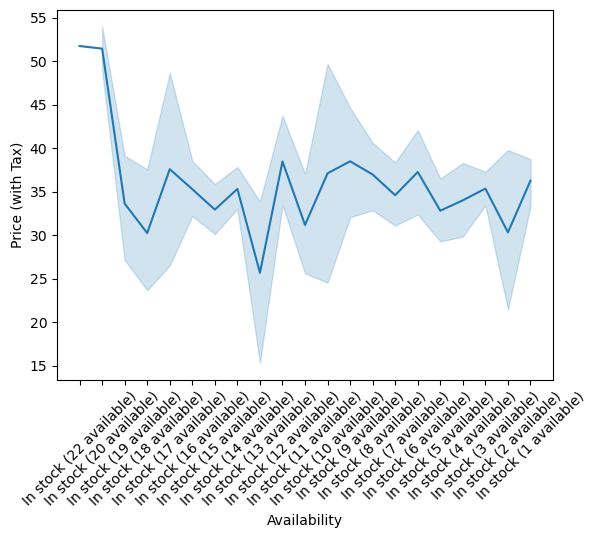

In [36]:
sns.lineplot(y='Price (with Tax)',x='Availability',data=books_df)
plt.xticks(rotation=45)
plt.show()

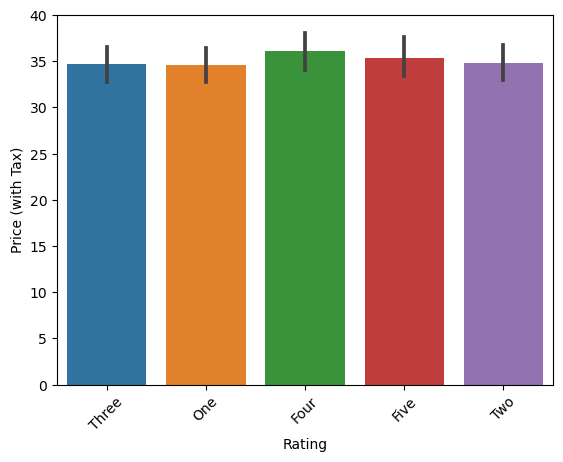

In [38]:
sns.barplot(y='Price (with Tax)',x='Rating',data=books_df)
plt.xticks(rotation=45)
plt.show()